Text(0, 0.5, 'Neighborhoods')

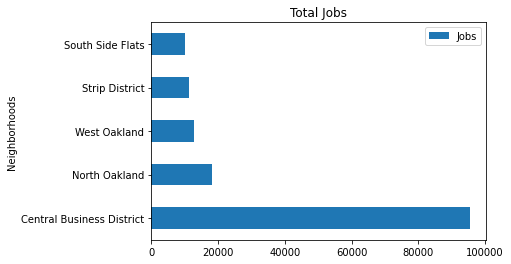

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("Neighborhoods_with_SNAP_Data.csv", index_col = "Neighborhood_2010_HOOD",parse_dates=True) #set neighboorhood columns as index

data = data[['Pop__2010','Total___Jobs_Located_in_N_hood_','SNAP_All_csv_Jobs_in__Hood__Con','SNAP_All_csv_Commute_to_Work__D']] # select only population, total jobs, and job % columns, get rid of other columns
data.dropna()
jobdata = data.drop(columns = ['Pop__2010', 'SNAP_All_csv_Jobs_in__Hood__Con','SNAP_All_csv_Commute_to_Work__D']) #drop unwanted columns in list
jobdata = jobdata.sort_values(by = 'Total___Jobs_Located_in_N_hood_', ascending = False) #sort descending

jobdata.columns = {'Jobs'} #rename columns
 #central business district huge outlier at 90000
jobdata.head().plot(kind = 'barh', title = "Total Jobs")
plt.ylabel('Neighborhoods')

We should get rid of the cerntral business district outlier, as there won't be much housing there and it will be very pricey.

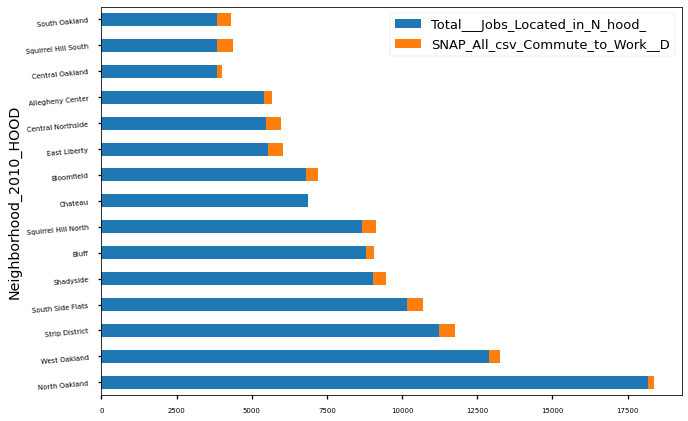

In [23]:
data = pd.read_csv("Neighborhoods_with_SNAP_Data.csv", index_col = "Neighborhood_2010_HOOD",parse_dates=True)#set neighboorhood columns as index

data = data[['Pop__2010','Total___Jobs_Located_in_N_hood_','SNAP_All_csv_Jobs_in__Hood__Con','SNAP_All_csv_Commute_to_Work__D']] # select only population, total jobs, and job % columns
data.dropna()
stackedchart = data.drop(columns = ['Pop__2010','SNAP_All_csv_Jobs_in__Hood__Con'])
stackedchart = stackedchart.sort_values(by = 'Total___Jobs_Located_in_N_hood_', ascending = False) #sort descending

for row in stackedchart:
    try:
        stackedchart['SNAP_All_csv_Commute_to_Work__D'] = stackedchart['SNAP_All_csv_Commute_to_Work__D'].str.rstrip('%').astype('float') * 10
        #strip away the % from string and convert to float 
        # have to multiply by a num because if it is a decimal it is too small to see
    except:
        pass
  
stackedchart = stackedchart[stackedchart['Total___Jobs_Located_in_N_hood_'] < 80000] # 
plt.style.use('seaborn-talk')

#stackedchart.columns = {'Proportion of those who commute to work','Jobs'} #rename columns
stackedchart.head(15).plot(kind = 'barh', rot = 5,stacked = True,fontsize=7)


  #https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte

Text(0, 0.5, 'Neighborhoods')

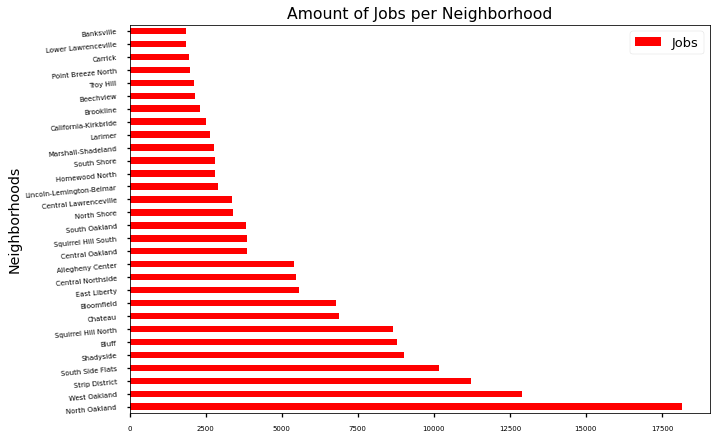

In [20]:
jobdata = data.drop(columns = ['Pop__2010', 'SNAP_All_csv_Jobs_in__Hood__Con','SNAP_All_csv_Commute_to_Work__D'])
jobdata = jobdata[jobdata['Total___Jobs_Located_in_N_hood_'] < 80000] # plot everything but business districtcol
jobdata = jobdata.sort_values(by = 'Total___Jobs_Located_in_N_hood_', ascending = False) #sort descending
jobdata.columns = {'Jobs'}
jobdata.head(30).plot(kind = 'barh', title = "Amount of Jobs per Neighborhood",rot=5,fontsize=7, color = 'red') #index is on y axis now
plt.ylabel('Neighborhoods')
#ask about dataset the other pittsburgh data set